<a href="https://colab.research.google.com/github/wddyzxxx/Machine-Learning-Python-code/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
A=np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
path = "/content/drive/MyDrive/Machine_Learning/ex1/ex1data1.txt"
data = pd.read_csv(path, header=None, names=["Population", "Profit"])
print(data.head())
print(data.tail())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
    Population   Profit
92      5.8707  7.20290
93      5.3054  1.98690
94      8.2934  0.14454
95     13.3940  9.05510
96      5.4369  0.61705


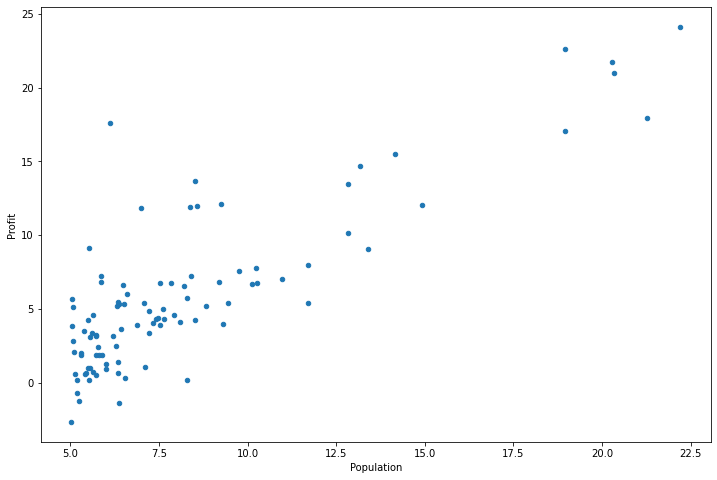

In [5]:
data.plot(kind='scatter',x='Population', y='Profit', figsize=(12,8))
plt.show()

In [6]:
data=np.array(data)
len(data)

97

In [7]:
col1=np.ones((97,1))
col3=np.column_stack((col1,data))
X=col3[:,0:2]
y=col3[:,2]
y=y.reshape(97,1)
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

In [8]:
theta = np.zeros((2,1))
theta.shape

(2, 1)

In [9]:
iters=1500
alpha=0.01

In [10]:
def computeCost(X, y, theta):
    inner = np.power(((X.dot(theta)) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
computeCost(X,y,theta)

32.072733877455676

In [45]:
def GradientDescent(X,y,theta,alpha,iters):
  temp = np.zeros(theta.shape)
  cost = np.zeros(iters)
  parameters = int(theta.shape[0])
  for i in range(iters):
    error=(X.dot(theta))-y
    for j in range(parameters):
      term = error*(X[:,j].reshape(len(X),1))
      temp[j,0] = theta[j,0] - ((alpha / len(X)) * np.sum(term))
    theta=temp
    cost[i]=computeCost(X,y,theta)
    
  return theta,cost
  


In [48]:
paras,cost=GradientDescent(X,y,theta,alpha,iters)
paras,cost

(array([[-3.63029144],
        [ 1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))

In [51]:
pre_popu=np.array([[1,3.5],[1,7]])
results=pre_popu.dot(paras)
results

array([[0.45197679],
       [4.53424501]])

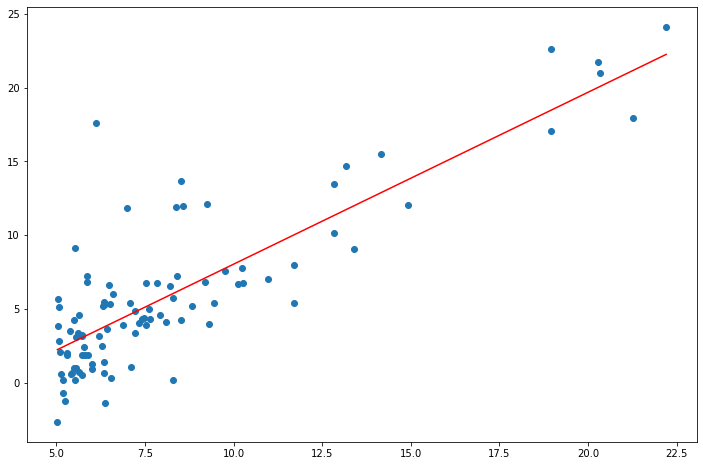

In [62]:
x = np.linspace(data[:,0].min(), data[:,0].max(), 100)
f = paras[0, 0] + (paras[1, 0] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data[:,0], data[:,1], label='Traning Data')

In [69]:
#开始第二个练习
path = "/content/drive/MyDrive/Machine_Learning/ex1/ex1data2.txt"
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [71]:
#特征归一化
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [73]:
data2.insert(0, 'Ones', 1)

ValueError: ignored

In [74]:
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [102]:
np.set_printoptions(suppress=False)
X=np.array(data2.iloc[:,0:3])
Y=np.array(data2.iloc[:,3]).reshape(len(Y),1)

In [92]:
theta2=np.zeros((3,1))

In [100]:
g2, cost2 = GradientDescent(X, Y, theta2, alpha, iters)
g2,cost2

(array([[-5.52985553e-17],
        [ 8.84042349e-01],
        [-5.24551809e-02]]),
 array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068671, 0.13068671,
        0.13068671]))

In [90]:
def normalEqn(X, Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y#X.T@X等价于X.T.dot(X)
    return theta

In [101]:
normalEqn(X,Y)

array([[-2.77555756e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])